In [55]:
    # Check free memory available
%system free -m

['               total        used        free      shared  buff/cache   available',
 'Mem:           15000        1014       12085           0        1899       13688',
 'Swap:              0           0           0']

In [56]:
#! pip install pandas_gbq


![Screenshot 2024-01-02 at 09.53.29.png]


In [57]:
# Import required libraries
from google.cloud import bigquery
import gc
from dateutil.relativedelta import relativedelta
import numpy as np
import math
import os
import pandas_gbq as pdg
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

<div class="alert alert-block alert-info">
    
create or replace table `yhcr-prd-phm-bia-core.CB_MYSPACE_RT.EarlyYears` as 
SELECT person_id,AcademicYear,AcademicAge,Gender,PSEAS1,PSEAS2,PSEAS3,PSETotal,
    CLLAS1,CLLAS2,CLLAS3,CLLAS4,CLLTotal,
    PSRNAS1,PSRNAS2,PSRNAS3,PSRNTotal,
    RKUW,RIPD,RICD,EYFSPTotal,
    COMG01,COMG02,COMG03,PHYG04,PHYG05,PSEG06,PSEG07,PSEG08,
    LITG09,LITG10,MATG11, MATG12,UTWG13,UTWG14,UTWG15,EXPG16,EXPG17,GLD FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_EYFSP` ;

</div>

In [58]:
# Instaniate BigQuery client

sqlEY = """ SELECT person_id,AcademicYear,Gender,PSEAS1,PSEAS2,PSEAS3,PSETotal,
    CLLAS1,CLLAS2,CLLAS3,CLLAS4,CLLTotal,
    PSRNAS1,PSRNAS2,PSRNAS3,PSRNTotal,
    RKUW,RIPD,RICD,EYFSPTotal,
    COMG01,COMG02,COMG03,PHYG04,PHYG05,PSEG06,PSEG07,PSEG08,
    LITG09,LITG10,MATG11, MATG12,UTWG13,UTWG14,UTWG15,EXPG16,EXPG17,GLD  FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_EYFSP` a """

EarlyYears = pdg.read_gbq(sqlEY, dialect='standard')

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloading: 100%|██████████|


In [59]:
df = EarlyYears

In [60]:
len(df)

130640

In [61]:
df.person_id.nunique()
# there are 130551 unique records in EYFS table
# 89 records as duplicates

130551

In [62]:
df = df.drop_duplicates(subset=['person_id'])
len(df)

130551

In [63]:
df = df.copy(deep=True)

<div class="alert alert-block alert-info">
<h2> 
Gender - Aggregate all records with 'F' and 'f' as 'F' - Female
All 'M' and 'm' as 'M' - Male
</h2>
</div>

In [64]:
df['newGLD'] = df['GLD'].apply(lambda set_: False if pd.isna(set_)== True else set_)
df['Gender'] = df['Gender'].apply(lambda set_: 'F' if (set_== 'f') else set_ )
df['Gender'] = df['Gender'].apply(lambda set_: 'M' if (set_== 'm') else set_)

In [65]:
df['newGLD'] = df['GLD'].apply(lambda set_: False if pd.isna(set_)== True else set_)
df['Gender'] = df['Gender'].apply(lambda set_: 'F' if (set_== 'f') else set_ )
df['Gender'] = df['Gender'].apply(lambda set_: 'M' if (set_== 'm') else set_)
df["AcademicBegin"]  = df["AcademicYear"].str.slice(0, 4)
df["AcademicEnd"] = df["AcademicYear"].str.slice(5)
#df

<div class="alert alert-block alert-info">
<h2> Changing all scores datatype to integer for calculations purposes from string and handling None
</h2>
</div>

In [66]:
#df['PSEAS1'] = df['PSEAS1'].apply(lambda set_: 0 if np.nan(set_)== True else int(set_))

df['PSEAS1'] = df['PSEAS1'].replace({None: 0,'N': 0})  
df['PSEAS2'] = df['PSEAS2'].replace({None: 0,'N': 0}) 
df['PSEAS3'] = df['PSEAS3'].replace({None: 0,'N': 0})
df['PSETotal'] = df['PSETotal'].replace({None: 0,'N': 0})
df['CLLAS1'] = df['CLLAS1'].replace({None: 0,'N': 0})
df['CLLAS2'] = df['CLLAS2'].replace({None: 0,'N': 0})
df['CLLAS3'] = df['CLLAS3'].replace({None: 0,'N': 0})
df['CLLAS4'] = df['CLLAS4'].replace({None: 0,'N': 0})
df['CLLTotal'] = df['CLLTotal'].replace({None: 0,'N': 0})
df['PSRNAS1'] = df['PSRNAS1'].replace({None: 0,'N': 0})
df['PSRNAS2'] = df['PSRNAS2'].replace({None: 0,'N': 0})
df['PSRNAS3'] = df['PSRNAS3'].replace({None: 0,'N': 0})
df['PSRNTotal'] = df['PSRNTotal'].replace({None: 0,'N': 0})
df['RKUW'] = df['RKUW'].replace({None: 0,'N': 0})
df['RIPD'] = df['RIPD'].replace({None: 0,'N': 0})
df['RICD'] = df['RICD'].replace({None: 0,'N': 0})
df['EYFSPTotal'] = df['EYFSPTotal'].replace({None: 0,'N': 0})

df['PSEAS1'] = df['PSEAS1'].astype(int)
df['PSEAS2'] = df['PSEAS2'].astype(int)
df['PSEAS3'] = df['PSEAS3'].astype(int)
df['PSETotal'] = df['PSETotal'].astype(int)
df['CLLAS1'] = df['CLLAS1'].astype(int)
df['CLLAS2'] = df['CLLAS2'].astype(int)
df['CLLAS3'] = df['CLLAS3'].astype(int)
df['CLLAS4'] = df['CLLAS4'].astype(int)
df['CLLTotal'] = df['CLLTotal'].astype(int)
df['PSRNAS1'] = df['PSRNAS1'].astype(int)
df['PSRNAS2'] = df['PSRNAS2'].astype(int)
df['PSRNAS3'] = df['PSRNAS3'].astype(int)
df['PSRNTotal'] = df['PSRNTotal'].astype(int)
df['RKUW'] = df['RKUW'].astype(int)
df['RIPD'] = df['RIPD'].astype(int)
df['RICD'] = df['RICD'].astype(int)
df['EYFSPTotal'] = df['EYFSPTotal'].astype(int)
df['AcademicBegin'] = df['AcademicBegin'].astype(int)
df['AcademicEnd'] = df['AcademicEnd'].astype(int)

#df.dtypes
                                     

<div class="alert alert-block alert-info">
<h3> For records pertaining to early years from 2002 - 2012 we have to set the GLD flag based on computation <br/>
         1. GLD Flag set it to true if all individual learning goals is above or equal to 6 and <br/>
         2. if the Total is greater than or equal to 78. Otherwise the GLD flag is set to false <br/>
</h3>
</div>

In [67]:
df.loc[(df['PSEAS1']>=6)&(df['PSEAS2']>=6)&(df['PSEAS3']>=6)&
       (df['CLLAS1']>=6)&(df['CLLAS2']>=6)&(df['CLLAS3']>=6)&(df['CLLAS4']>=6)&
       (df['PSRNAS1']>=6)&(df['PSRNAS2']>=6)&(df['PSRNAS3']>=6)&
       (df['RKUW']>=6)&(df['RICD']>=6)&(df['RIPD']>=6)&(df['EYFSPTotal']>=78), 'newGLD'] = True   

In [68]:
rf = df

In [69]:
import hvplot.pandas  # noqa
import xarray as xr
import pandas as pd
import panel as pn

In [70]:
rf = rf.drop(['GLD'],axis=1)

In [71]:
dfinteractive = rf.interactive()

In [72]:
year_slider = pn.widgets.IntSlider(name='Academic Year slider', start=2002, end=2019, step=1, value=2019)
year_slider

IntSlider(end=2019, name='Academic Year slider', start=2002, value=2019)

In [73]:
yaxis_NCCISCODE_source = 'person_id'

yaxis_NCCIS_source = 'EYFSPTotal'

NCCIS_source_bar_pipeline = (
    dfinteractive[
        (dfinteractive.AcademicBegin <= year_slider)
    ]
    .groupby(['AcademicBegin','Gender'])[yaxis_NCCISCODE_source].nunique()
    .to_frame()
    .reset_index()
    .sort_values(by='AcademicBegin')  
    .reset_index(drop=True)
)
NCCIS_plot = NCCIS_source_bar_pipeline.hvplot(kind='bar',stacked=True,legend="top_left",height=500,
                                                     x='AcademicBegin',by='Gender',y=yaxis_NCCISCODE_source, 
                                                     title='Gender appearance per Academic Year in EYFSP',width=1000)

NCCIS_plot

In [74]:
EYGP = rf.groupby(['AcademicBegin','Gender', 'newGLD']).agg({
                    'Gender':'value_counts'
}).rename(columns={'Gender':'COUNTByGender'})
EYGP

COUNTByGender
AcademicBegin Gender newGLD               
2002          F      False             185
                     True              204
              M      False             247
                     True              153
2003          F      False             179
...                                    ...
2017          M      True             2990
2018          F      False            1188
                     True             3386
              M      False            1932
                     True             3081

[68 rows x 1 columns]

In [75]:
matrix = EYGP.reset_index()
GLDTrueFGenderData = matrix[(matrix['newGLD']==True) & (matrix['Gender']=='F') ]
GLDTrueMGenderData = matrix[(matrix['newGLD']==True) & (matrix['Gender']=='M') ]

GLDFalseFGenderData = matrix[(matrix['newGLD']==False) & (matrix['Gender']=='F') ]
GLDFalseMGenderData = matrix[(matrix['newGLD']==False) & (matrix['Gender']=='M') ]

GLDTrueFGenderData = GLDTrueFGenderData.drop(['Gender','newGLD'], axis=1)
GLDTrueMGenderData = GLDTrueMGenderData.drop(['Gender','newGLD'], axis=1)

GLDFalseFGenderData = GLDFalseFGenderData.drop(['Gender','newGLD'], axis=1)
GLDFalseMGenderData = GLDFalseMGenderData.drop(['Gender','newGLD'], axis=1)

<Figure size 3000x3000 with 0 Axes>

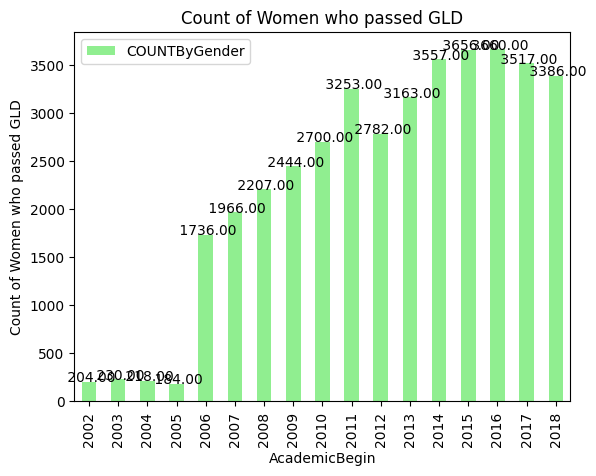

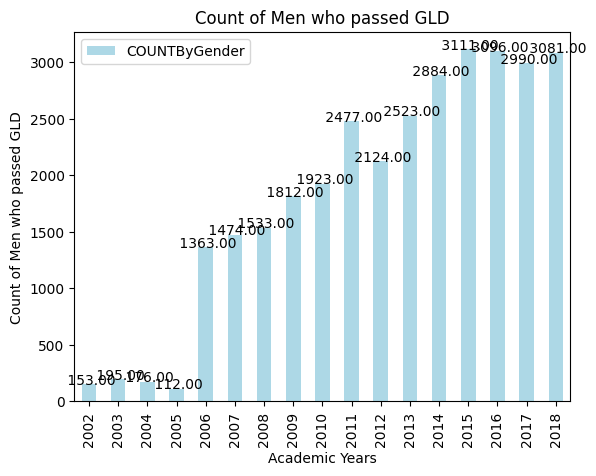

In [76]:
from matplotlib import ticker
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))

# plt.bar(X_axis - 0.2, GLDTrueFGenderData, 0.4, color="purple",label = 'Women Passed GLD')
# plt.bar(X_axis + 0.2, GLDTrueMGenderData, 0.4, color="red", label = 'Men Passed GLD')
  
ax = GLDTrueFGenderData.set_index('AcademicBegin').plot.bar(color="lightgreen")
bx = GLDTrueMGenderData.set_index('AcademicBegin').plot.bar(color="lightblue")


ax.set_ylabel("Count of Women who passed GLD")
bx.set_ylabel("Count of Men who passed GLD")

#plt.xticks(X_axis, X_Label)
plt.legend()
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("Academic Years")

plt.title("GLD Attainment")


for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    ax.set_title("Count of Women who passed GLD")    
    
for bar in bx.patches:
    height = bar.get_height()
    bx.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    bx.set_title("Count of Men who passed GLD")    

plt.show()

 

<Figure size 3000x3000 with 0 Axes>

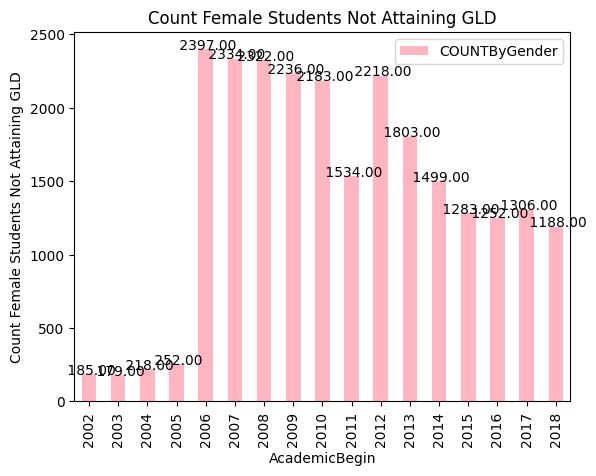

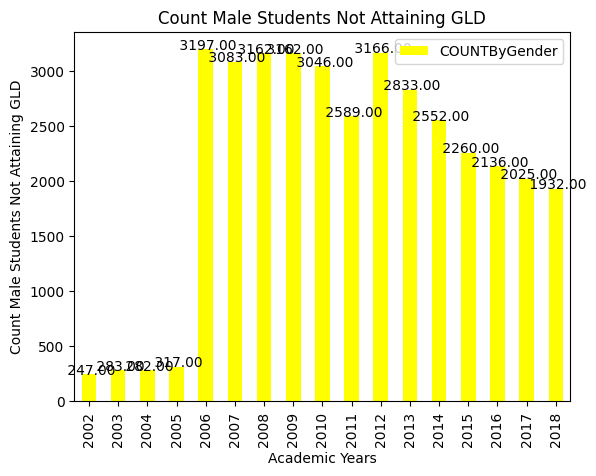

In [77]:
from matplotlib import ticker
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))

# plt.bar(X_axis - 0.2, GLDTrueFGenderData, 0.4, color="purple",label = 'Women Passed GLD')
# plt.bar(X_axis + 0.2, GLDTrueMGenderData, 0.4, color="red", label = 'Men Passed GLD')
  
ax = GLDFalseFGenderData.set_index('AcademicBegin').plot.bar(color="lightpink")
bx = GLDFalseMGenderData.set_index('AcademicBegin').plot.bar(color="yellow")


ax.set_ylabel("Count Female Students Not Attaining GLD")
bx.set_ylabel("Count Male Students Not Attaining GLD")

#plt.xticks(X_axis, X_Label)
plt.legend()
plt.xticks(rotation = 90, fontsize = 10)
plt.xlabel("Academic Years")

plt.title("GLD Attainment")


for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    ax.set_title("Count Female Students Not Attaining GLD")    
    
for bar in bx.patches:
    height = bar.get_height()
    bx.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    bx.set_title("Count Male Students Not Attaining GLD")    

plt.show()

 

<div class="alert alert-block alert-info">
<h3> For records pertaining to early years from 2002 - 2018 we have to retreive data fro the NEET Summary Table<br/>
         1. Analyse the records <br/>
         2. In compliance with the Child Act of 2006, we will exclude data from 2002 to 2005. Subsequently, we will cross-reference records between EYFS and NCCIS, focusing on students aged 16-18 years. <br/>
</h3>
</div>

In [78]:

# Instaniate BigQuery client

sqlEYFSNEET = """ SELECT * FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_EYFSP` a, `yhcr-prd-phm-bia-core.CB_2166.wide_format_NEET_final` b where a.person_id = b.person_id """

EYFSPDF = pdg.read_gbq(sqlEYFSNEET, dialect='standard')
#sqlWideFormat


Downloading: 100%|██████████|


In [79]:
EYFSPDF

,person_id,EDRN,AcademicYear,PupilMatchingRefAnonymous,AgeStart,MonthPart,YearOfBirth,MonthOfBirth,Gender,LA,...,AcademicYearAge15to16,LSOA_name,lat_long,Bradford_YN,ever_NEET,Persistent_NEET_YN_over_4months,Total_neet_months,total_number_of_observations,percentage_time_neet,NumberOfMonthsUnknown
0,12405978,CB1A612E3EC15B0E16CD67FBCB7466A,2005/2006,CCA553CA30D8B8FAC5,4,4,2001,4,F,381,...,2016/2017,Bradford 054B,POINT(-1.78338 53.7681),True,False,False,0,24,0.0,3
1,13404207,C148CBD4B2F9CC9271FF1A34DE76D771,2006/2007,CCA653CE35DCB5FBCA,4,1,2002,7,F,315,...,2017/2018,None,None,False,False,False,0,24,0.0,1
2,13673392,16B99C34C6AB4E14509CD840FA2AAD7,2002/2003,CCF850C033D3BBFBCC,4,0,1998,8,F,380,...,2013/2014,Bradford 008C,POINT(-1.90618 53.8725),True,False,False,0,24,0.0,4
3,13618606,1753FB63790D41625F113AE3BEEF8C,2003/2004,CCF850C033DAB8F0CB,4,8,1998,12,F,380,...,2014/2015,Bradford 019G,POINT(-1.73452 53.8317),True,False,False,0,24,0.0,1
4,616222,A1758D43AEEDFD1FA99F7F1D6B69548D,2002/2003,CCF850C033DDB5FFC9,4,1,1998,7,F,380,...,2013/2014,Bradford 034B,POINT(-1.77223 53.813),True,False,False,0,24,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11469,12417201,49553D60F6A981131AA9C7D7B9CA91,2006/2007,CCF95EC935DEBCF9CD,4,0,2002,8,F,890,...,2017/2018,None,None,False,False,False,0,12,0.0,1
11470,13661188,EB6750CE55D0E7A2D9778722732DDF33,2006/2007,CCF95ECA30DDBEFECE,4,8,2001,12,M,380,...,2017/2018,Bradford 061B,POINT(-1.76674 53.7449),True,False,False,0,12,0.0,0
11471,13139328,CA19BB3EE4DE54DFB2A8081BFDC992D,2006/2007,CCF95ECB31D9BBFDCC,4,0,2002,8,M,382,...,2017/2018,Richmondshire 005A,POINT(-2.06091 54.2907),False,False,False,0,17,0.0,7
11472,829469,36B468EA57F44C9EB1EC1FF62DDE0,2006/2007,CCF95ECB33D9BEFDC5,4,3,2002,5,M,380,...,2017/2018,Bradford 061E,POINT(-1.77057 53.7298),True,False,False,0,7,0.0,0


In [80]:
EYSFTransactDF = EYFSPDF
len(EYSFTransactDF)

11474

In [81]:
EYSFTransactDF = EYSFTransactDF.drop_duplicates(subset=['person_id'])
len(EYSFTransactDF)

11451

In [82]:
EYSFTransactDF = EYSFTransactDF.copy(deep=True)

In [83]:
EYSFTransactDF['newGLD'] = EYSFTransactDF['GLD'].apply(lambda set_: False if pd.isna(set_)== True else set_)
EYSFTransactDF['Gender'] = EYSFTransactDF['Gender'].apply(lambda set_: 'F' if (set_== 'f') else set_ )
EYSFTransactDF['Gender'] = EYSFTransactDF['Gender'].apply(lambda set_: 'M' if (set_== 'm') else set_)

EYSFTransactDF['newGLD'] = EYSFTransactDF['GLD'].apply(lambda set_: False if pd.isna(set_)== True else set_)
EYSFTransactDF['Gender'] = EYSFTransactDF['Gender'].apply(lambda set_: 'F' if (set_== 'f') else set_ )
EYSFTransactDF['Gender'] = EYSFTransactDF['Gender'].apply(lambda set_: 'M' if (set_== 'm') else set_)
EYSFTransactDF["AcademicBegin"]  = EYSFTransactDF["AcademicYear"].str.slice(0, 4)
EYSFTransactDF["AcademicEnd"] = EYSFTransactDF["AcademicYear"].str.slice(5)
#df

In [84]:

EYSFTransactDF['PSEAS1'] = EYSFTransactDF['PSEAS1'].replace({None: 0,'N': 0})  
EYSFTransactDF['PSEAS2'] = EYSFTransactDF['PSEAS2'].replace({None: 0,'N': 0}) 
EYSFTransactDF['PSEAS3'] = EYSFTransactDF['PSEAS3'].replace({None: 0,'N': 0})
EYSFTransactDF['PSETotal'] = EYSFTransactDF['PSETotal'].replace({None: 0,'N': 0})
EYSFTransactDF['CLLAS1'] = EYSFTransactDF['CLLAS1'].replace({None: 0,'N': 0})
EYSFTransactDF['CLLAS2'] = EYSFTransactDF['CLLAS2'].replace({None: 0,'N': 0})
EYSFTransactDF['CLLAS3'] = EYSFTransactDF['CLLAS3'].replace({None: 0,'N': 0})
EYSFTransactDF['CLLAS4'] = EYSFTransactDF['CLLAS4'].replace({None: 0,'N': 0})
EYSFTransactDF['CLLTotal'] = EYSFTransactDF['CLLTotal'].replace({None: 0,'N': 0})
EYSFTransactDF['PSRNAS1'] = EYSFTransactDF['PSRNAS1'].replace({None: 0,'N': 0})
EYSFTransactDF['PSRNAS2'] = EYSFTransactDF['PSRNAS2'].replace({None: 0,'N': 0})
EYSFTransactDF['PSRNAS3'] = EYSFTransactDF['PSRNAS3'].replace({None: 0,'N': 0})
EYSFTransactDF['PSRNTotal'] = EYSFTransactDF['PSRNTotal'].replace({None: 0,'N': 0})
EYSFTransactDF['RKUW'] = EYSFTransactDF['RKUW'].replace({None: 0,'N': 0})
EYSFTransactDF['RIPD'] = EYSFTransactDF['RIPD'].replace({None: 0,'N': 0})
EYSFTransactDF['RICD'] = EYSFTransactDF['RICD'].replace({None: 0,'N': 0})
EYSFTransactDF['EYFSPTotal'] = EYSFTransactDF['EYFSPTotal'].replace({None: 0,'N': 0})


EYSFTransactDF['PSEAS1'] = EYSFTransactDF['PSEAS1'].astype(int)
EYSFTransactDF['PSEAS2'] = EYSFTransactDF['PSEAS2'].astype(int)
EYSFTransactDF['PSEAS3'] = EYSFTransactDF['PSEAS3'].astype(int)
EYSFTransactDF['PSETotal'] = EYSFTransactDF['PSETotal'].astype(int)
EYSFTransactDF['CLLAS1'] = EYSFTransactDF['CLLAS1'].astype(int)
EYSFTransactDF['CLLAS2'] = EYSFTransactDF['CLLAS2'].astype(int)
EYSFTransactDF['CLLAS3'] = EYSFTransactDF['CLLAS3'].astype(int)
EYSFTransactDF['CLLAS4'] = EYSFTransactDF['CLLAS4'].astype(int)
EYSFTransactDF['CLLTotal'] = EYSFTransactDF['CLLTotal'].astype(int)
EYSFTransactDF['PSRNAS1'] = EYSFTransactDF['PSRNAS1'].astype(int)
EYSFTransactDF['PSRNAS2'] = EYSFTransactDF['PSRNAS2'].astype(int)
EYSFTransactDF['PSRNAS3'] = EYSFTransactDF['PSRNAS3'].astype(int)
EYSFTransactDF['PSRNTotal'] = EYSFTransactDF['PSRNTotal'].astype(int)
EYSFTransactDF['RKUW'] = EYSFTransactDF['RKUW'].astype(int)
EYSFTransactDF['RIPD'] = EYSFTransactDF['RIPD'].astype(int)
EYSFTransactDF['RICD'] = EYSFTransactDF['RICD'].astype(int)
EYSFTransactDF['EYFSPTotal'] = EYSFTransactDF['EYFSPTotal'].astype(int)
EYSFTransactDF['AcademicBegin'] = EYSFTransactDF['AcademicBegin'].astype(int)
EYSFTransactDF['AcademicEnd'] = EYSFTransactDF['AcademicEnd'].astype(int)

#df.dtypes

EYSFTransactDF.loc[(EYSFTransactDF['PSEAS1']>=6)&(EYSFTransactDF['PSEAS2']>=6)&(EYSFTransactDF['PSEAS3']>=6)&
       (EYSFTransactDF['CLLAS1']>=6)&(EYSFTransactDF['CLLAS2']>=6)&(EYSFTransactDF['CLLAS3']>=6)&(EYSFTransactDF['CLLAS4']>=6)&
       (EYSFTransactDF['PSRNAS1']>=6)&(EYSFTransactDF['PSRNAS2']>=6)&(EYSFTransactDF['PSRNAS3']>=6)&
       (EYSFTransactDF['RKUW']>=6)&(EYSFTransactDF['RICD']>=6)&(EYSFTransactDF['RIPD']>=6)&(EYSFTransactDF['EYFSPTotal']>=78), 'newGLD'] = True   
                                     

In [85]:
EYSFTransactDF.columns

Index(['person_id', 'EDRN', 'AcademicYear', 'PupilMatchingRefAnonymous',
       'AgeStart', 'MonthPart', 'YearOfBirth', 'MonthOfBirth', 'Gender', 'LA',
       ...
       'Bradford_YN', 'ever_NEET', 'Persistent_NEET_YN_over_4months',
       'Total_neet_months', 'total_number_of_observations',
       'percentage_time_neet', 'NumberOfMonthsUnknown', 'newGLD',
       'AcademicBegin', 'AcademicEnd'],
      dtype='object', length=197)

<div class="alert alert-block alert-info">
    <h2>
    1. 47.7% Women students appeared during the academic year 2006-2007 <br/>
    2. 52.2% Men students appeared during the academic year 2006-2007 <br/>
    </h2>
</div>
    

<div class="alert alert-block alert-warning">
    <h3> Due to Statutary limitation of the EYFSP - we will avoid the records from 2002-2005</h3>
</div>

In [86]:
statutaryYears2007_2009 = EYSFTransactDF[EYSFTransactDF["AcademicBegin"]>=2006]
statutaryYears2007_2009 = statutaryYears2007_2009.rename(columns={'Persistent_NEET_YN_over_4months':'Persistent_NEET'})
#statutaryYears2007_2009.dtypes
statutaryYears2007_2009

,person_id,EDRN,AcademicYear,PupilMatchingRefAnonymous,AgeStart,MonthPart,YearOfBirth,MonthOfBirth,Gender,LA,...,Bradford_YN,ever_NEET,Persistent_NEET,Total_neet_months,total_number_of_observations,percentage_time_neet,NumberOfMonthsUnknown,newGLD,AcademicBegin,AcademicEnd
1,13404207,C148CBD4B2F9CC9271FF1A34DE76D771,2006/2007,CCA653CE35DCB5FBCA,4,1,2002,7,F,315,...,False,False,False,0,24,0.00000,1,True,2006,2007
21,13537598,906BAA36F8591152649E3E38F15C54C8,2006/2007,CCF951C030D3B8FBC4,4,8,2001,12,F,380,...,True,True,False,2,12,16.66667,1,False,2006,2007
22,12559531,7ABF60582FECEA9B6125659BC3676CE3,2006/2007,CCF951C030DEBAFBCD,4,4,2002,4,F,380,...,True,False,False,0,12,0.00000,0,False,2006,2007
23,12414821,5EC617AF9243D82A263998D39EB2654,2006/2007,CCF951C030DEBBFEC8,4,3,2002,5,F,380,...,True,False,False,0,12,0.00000,0,False,2006,2007
24,12870963,CFE7E844F1BCF5E42DED1E72F0339861,2006/2007,CCF951C030DFBAF9CE,4,7,2002,1,M,380,...,True,False,False,0,12,0.00000,0,False,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11469,12417201,49553D60F6A981131AA9C7D7B9CA91,2006/2007,CCF95EC935DEBCF9CD,4,0,2002,8,F,890,...,False,False,False,0,12,0.00000,1,False,2006,2007
11470,13661188,EB6750CE55D0E7A2D9778722732DDF33,2006/2007,CCF95ECA30DDBEFECE,4,8,2001,12,M,380,...,True,False,False,0,12,0.00000,0,True,2006,2007
11471,13139328,CA19BB3EE4DE54DFB2A8081BFDC992D,2006/2007,CCF95ECB31D9BBFDCC,4,0,2002,8,M,382,...,False,False,False,0,17,0.00000,7,True,2006,2007
11472,829469,36B468EA57F44C9EB1EC1FF62DDE0,2006/2007,CCF95ECB33D9BEFDC5,4,3,2002,5,M,380,...,True,False,False,0,7,0.00000,0,True,2006,2007


In [87]:
disp1 = statutaryYears2007_2009[['person_id','PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD','PSETotal','CLLTotal','PSRNTotal','EYFSPTotal','newGLD']]
#disp1


In [88]:
# disp2 = statutaryYears2007_2009[['person_id','newGLD','COMG01','COMG02','COMG03','PHYG04','PHYG05','PSEG06','PSEG07','PSEG08','LITG09','LITG10','MATG11','MATG12','UTWG13','UTWG14','UTWG15','EXPG16','EXPG17']]
# disp2

#disp3 = statutaryYears2007_2009[statutaryYears2007_2009['EYFSPTotal'] >= 78]
disp3 = disp1[disp1['EYFSPTotal'] >= 78]
disp3.newGLD.sum()

#disp3


2925

<div class="alert alert-block alert-info">
    <h2>
    1. 5111 records have EYFSP total greater or equal to 78<br/>
    2. out of 5111, only 2923 records have GLD attainment <br/>
    3. These records are interesting to probe further as students have scored abobe the total but have missed on a subject.  further analysis can reveal which subjects students under perform 
    </h2>
</div>
    

<div class="alert alert-block alert-info">
<h3> 2923 students have EYFSPTotal >=78 and have Good Level of Development attaintment True </h3>
<h3> 5108 - 2925 = 2183 have EYFSPTotal >= 78 but Good Level of Development attaintment False </h3>
# These records are quite interesting for research to see which subjects predicts future NEET #
    
</div>

In [89]:
GraphingData = statutaryYears2007_2009.groupby(['AcademicYear','newGLD','Gender']).agg({
    'Gender':'value_counts',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum',
    #'LSOA_name':'count'
    #'newGLD':'value_counts',
     }).rename(columns={'Gender':'COUNTByGender'})
GraphingData   


COUNTByGender  ever_NEET  Persistent_NEET
AcademicYear newGLD Gender                                           
2006/2007    False  F                2273        214               96
                    M                3012        356              155
             True   F                1642         67               23
                    M                1271         52               22
2007/2008    False  F                  14          0                0
                    M                  16          0                0
             True   F                   5          0                0
                    M                   7          1                1

In [90]:
GraphingNonNeetData = statutaryYears2007_2009.groupby(['AcademicYear','newGLD']).agg({
   # 'Gender':'value_counts',
    'ever_NEET':lambda x: (x==False).sum(),
    'Persistent_NEET':lambda x: (x==False).sum(),
    #'LSOA_name':'count'
    #'newGLD':'value_counts',
     }).rename(columns={'Gender':'COUNTByGender'})
GraphingNonNeetData   



ever_NEET  Persistent_NEET
AcademicYear newGLD                            
2006/2007    False        4715             5034
             True         2794             2868
2007/2008    False          30               30
             True           11               11

In [2]:
GraphingDataLSOA = statutaryYears2007_2009.groupby(['AcademicYear','newGLD','Gender']).agg({
    'Gender':'value_counts',
    #'ever_NEET':'sum',
    #'Persistent_NEET':'sum',
    'Bradford_YN':'sum'
    #'newGLD':'value_counts',
     }).rename(columns={'Gender':'COUNTByGender'})
GraphingDataLSOA   



NameError: name 'statutaryYears2007_2009' is not defined

In [3]:
matrix = GraphingData.reset_index()
# plt.bar(X_axis + 0.8, GraphingData['ever_NEET'][2], 0.4, label = 'Female Ever Neet ')
# plt.bar(X_axis + 1.2, GraphingData['ever_NEET'][3], 0.4, label = 'Male Ever Neet')

NameError: name 'GraphingData' is not defined

In [ ]:
GLDTrueGenderData = matrix[(matrix['newGLD']==True)]
GLDFalseGenderData = matrix[(matrix['newGLD']==False)]
GLDTrueGenderData = GLDTrueGenderData.set_index(['AcademicYear','Gender'])
print(GLDTrueGenderData)
GLDFalseGenderData = GLDFalseGenderData.set_index(['AcademicYear','Gender'])
print(GLDFalseGenderData)



In [ ]:
matrixLSOA = GraphingDataLSOA.reset_index()
GLDTrueGenderDataLSOA = matrixLSOA[(matrixLSOA['newGLD']==True)]
GLDFalseGenderDataLSOA = matrixLSOA[(matrixLSOA['newGLD']==False)]
GLDTrueGenderDataLSOA = GLDTrueGenderDataLSOA.set_index(['AcademicYear','Gender'])
print(GLDTrueGenderDataLSOA)
GLDFalseGenderDataLSOA = GLDFalseGenderDataLSOA.set_index(['AcademicYear','Gender'])
print(GLDFalseGenderDataLSOA)

from matplotlib import ticker
import matplotlib.pyplot as plt

GLDFalseGenderDataLSOA.drop(GLDFalseGenderDataLSOA.tail(2).index,
        inplace = True)
lx=GLDFalseGenderDataLSOA.plot(kind='bar')
plt.ylabel('Count of people from Bradford LSOA')

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

for bar in lx.patches:
    height = bar.get_height()
    lx.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    lx.set_title("count of GLD non attainment based out of Bradford LSOA")
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <h3>
        <div>
    2006 - GLD True ->  2914 -Ever NEET ->119 =>4.07%-> Persistent NEET 1.54%  <br/>
        -     Female-> 20.01% -> Ever NEET -> 2.2%-> Persistent NEET 0.79% <br/>
        -     Male -> 15.50% -> Ever NEET -> 1.78%-> Persistent NEET 0.76% 
<br/>
    2006 - GLD False-> 5290 - Ever NEET ->570 =>10.77%-> Persistent NEET 4.74%  <br/>
        -     Female-> 27.74% -> Ever NEET -> 4.04% -> Persistent NEET 1.81% <br/>
        -     Male -> 36.74% -> Ever NEET -> 6.72% -> Persistent NEET 2.92%  
        </div>
<br/>
    2007 - GLD True ->  13 - Ever NEET ->1 => 7%
<br/>
    2007 - GLD False-> 39 - Ever NEET ->1 => 2.56%
    </h3>
</div>

In [4]:
from matplotlib import ticker
import matplotlib.pyplot as plt

GLDTrueGenderData.drop(GLDTrueGenderData.tail(2).index,
        inplace = True)
ax=GLDTrueGenderData.plot(kind='bar')
plt.ylabel('GLD Status by Gender')

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    ax.set_title("count of GLD attainment True vs NEET based on Gender")
plt.tight_layout()
plt.show()

NameError: name 'GLDTrueGenderData' is not defined

In [ ]:
GLDFalseGenderData.drop(GLDFalseGenderData.tail(2).index,
        inplace = True)


bx=GLDFalseGenderData.plot(kind='bar')
plt.ylabel('GLD Status by Gender')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

for bar in bx.patches:
    height = bar.get_height()
    bx.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    bx.set_title("count of GLD attainment False vs NEET based on Gender")

In [5]:
corrDF = statutaryYears2007_2009[['newGLD','ever_NEET','Persistent_NEET','PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD','PSETotal','CLLTotal','PSRNTotal','EYFSPTotal']]

pearson=corrDF.corr(method='pearson')
pearson


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corrDF.corr(method='pearson'),annot = True)
plt.show()

NameError: name 'statutaryYears2007_2009' is not defined

In [ ]:
X=statutaryYears2007_2009[['RIPD','RICD','RKUW','PSETotal','CLLTotal','PSRNTotal','EYFSPTotal']]
y=statutaryYears2007_2009[['newGLD']]
### The data has to be divided in training and test set. 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [ ]:
len(statutaryYears2007_2009)

In [6]:
GLDTrueData = GLDTrueGenderData.reset_index()
GLDFalseData = GLDFalseGenderData.reset_index()
GLDFalseData

NameError: name 'GLDTrueGenderData' is not defined

In [7]:
GLDFailedCount = GLDFalseData.COUNTByGender[0] + GLDFalseData.COUNTByGender[1]
GLDFailedCount

NameError: name 'GLDFalseData' is not defined

In [8]:
# Lets find out the number of students who has failed to attaintment condition

test_Fail_EYFSP = statutaryYears2007_2009.groupby(['AcademicYear','newGLD','Gender']).agg({
    'Gender':'count', 
    #'newGLD':lambda x: (x==False).sum(),
    'ever_NEET':'sum',
    'Persistent_NEET':'sum',
    'PSEAS1':lambda ts: (ts < 6).sum(),
    'PSEAS2':lambda ts: (ts < 6).sum(),
    'PSEAS3':lambda ts: (ts < 6).sum(),
   # 'PSETotal': 'sum',
    'CLLAS1':lambda ts: (ts < 6).sum(),
    'CLLAS2':lambda ts: (ts < 6).sum(),
    'CLLAS3':lambda ts: (ts < 6).sum(),
    'CLLAS4':lambda ts: (ts < 6).sum(),
   # 'CLLTotal':'sum',
    'PSRNAS1':lambda ts: (ts < 6).sum(),
    'PSRNAS2':lambda ts: (ts < 6).sum(),
    'PSRNAS3':lambda ts: (ts < 6).sum(),
   # 'PSRNTotal':lambda ts: (ts >= 6).sum(),
    'RKUW':lambda ts: (ts < 6).sum(),
    'RIPD':lambda ts: (ts < 6).sum(),
    'RICD':lambda ts: (ts < 6).sum(),
    'EYFSPTotal':lambda ts: (ts <78 ).sum()
    }).rename(columns={'Gender':'COUNTByGender'})

test_Fail_EYFSP



NameError: name 'statutaryYears2007_2009' is not defined

In [9]:
# Lets find out the number of students who has failed to attaintment condition

statsCountNEET = statutaryYears2007_2009.groupby(['AcademicYear', 'newGLD']).agg({ 
    #'newGLD':lambda x: (x==False).sum(),
    'ever_NEET':lambda x: (x==True).sum(),
    'Persistent_NEET': lambda x: (x==True).sum(),
    'PSEAS1':lambda ts: (ts < 6).sum(),
    'PSEAS2':lambda ts: (ts < 6).sum(),
    'PSEAS3':lambda ts: (ts < 6).sum(),
   # 'PSETotal': 'sum',
    'CLLAS1':lambda ts: (ts < 6).sum(),
    'CLLAS2':lambda ts: (ts < 6).sum(),
    'CLLAS3':lambda ts: (ts < 6).sum(),
    'CLLAS4':lambda ts: (ts < 6).sum(),
   # 'CLLTotal':'sum',
    'PSRNAS1':lambda ts: (ts < 6).sum(),
    'PSRNAS2':lambda ts: (ts < 6).sum(),
    'PSRNAS3':lambda ts: (ts < 6).sum(),
   # 'PSRNTotal':lambda ts: (ts >= 6).sum(),
    'RKUW':lambda ts: (ts < 6).sum(),
    'RIPD':lambda ts: (ts < 6).sum(),
    'RICD':lambda ts: (ts < 6).sum(),
    'EYFSPTotal':lambda ts: (ts <78 ).sum()
    })
#.rename(columns={'Gender':'COUNTByGender'})

statsCountNEET




NameError: name 'statutaryYears2007_2009' is not defined

In [10]:
sumval = (test_Fail_EYFSP/5285)*100
sumval

NameError: name 'test_Fail_EYFSP' is not defined

In [11]:
sumvalALL = (statsCountNEET/5285)*100
sumvalALL

NameError: name 'statsCountNEET' is not defined

In [12]:
genderPercentOver = sumval.reset_index()
genderPercentOver.drop(genderPercentOver.tail(4).index,
        inplace = True)
genderPercentOverFemale = genderPercentOver.query("newGLD == False & Gender.str.contains('F')")
genderPercentOverMale = genderPercentOver.query("newGLD == False & Gender.str.contains('M')")

#labels1 = ['PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD']
genderPercentOverFemale= genderPercentOverFemale[['ever_NEET','Persistent_NEET','PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD']]
genderPercentOverMale= genderPercentOverMale[['ever_NEET','Persistent_NEET','PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD']]
genderPercentOverMale


NameError: name 'sumval' is not defined

In [ ]:
PercentOver = sumvalALL.reset_index()
PercentOver.drop(PercentOver.tail(2).index,
        inplace = True)
PercentOverGP = PercentOver.query("newGLD == False")
PercentOverGP= PercentOverGP[['newGLD','ever_NEET','Persistent_NEET','PSEAS1','PSEAS2','PSEAS3','CLLAS1','CLLAS2','CLLAS3','CLLAS4','PSRNAS1','PSRNAS2','PSRNAS3','RKUW','RICD','RIPD']]
PercentOverGP = PercentOverGP.rename(columns={'PSEAS1':'Personal Social Emotional - readiness Classroom',
                      'PSEAS2':'Personal Social Emotional - readiness Relationship',
                      'PSEAS3':'Personal Social Emotional - readiness Expressive',
                      'CLLAS1':'Communication, language, literacy - Listening',
                      'CLLAS2':'Communication, language, literacy - Reading',
                      'CLLAS3':'Communication, language, literacy - Reading Books',
                      'CLLAS4':'Communication, language, literacy - Communication',
                      'PSRNAS1':'Problem solving Reasoning and Numeracy - Counting',
                      'PSRNAS2':'Problem solving Reasoning and Numeracy - Recognition',
                      'PSRNAS3':'Problem solving Reasoning and Numeracy - Practicing',
                      'RKUW':'Understanding of the World',
                      'RIPD':'Physical Development',
                      'RICD':'Creative Development'})

In [13]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tfs = PercentOverGP
tfs1 = pd.melt(tfs, id_vars = "newGLD")

tfs1 = tfs1.rename(columns={"variable": "NEET and Domains"})

g=sns.catplot(x = 'newGLD', y='value',hue = 'NEET and Domains',data=tfs1, kind='bar', width = 1, legend=True, height=6, aspect=2, palette = 'pastel')
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() ):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
#sns.despine()
plt.title("GLD Failed percenatge w.r.t NEET and Domains")
plt.xlabel("Percentage failure in Good Level of Development Domain wise")
#plt.xticks(rotation=90)
plt.show()




NameError: name 'PercentOverGP' is not defined

In [ ]:
from matplotlib import ticker
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,12))
plt.subplots_adjust(wspace=0.2)

genderPercentOverFemale.plot(kind='bar',ax=ax1)
ax1.set_ylabel('subject by percentages')

for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=12,
            ha='center')
    ax1.set_title("Percentage of GLD non attainment by Female")
    

genderPercentOverMale.plot(kind='bar', ax=ax2)
ax2.set_ylabel('subject by percentages')
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=12,
            ha='center')
    ax2.set_title("Percentage of GLD non attainment by Male")
    
plt.show() 
 

In [ ]:
#overall = test_Fail_EYFSP.groupby(level=0).transform('sum')
# overall = sumval.groupby(level=0).transform('sum')
# overall

In [ ]:
# Lets find out the number of students who has failed to attaintment condition

test_Fail_EYFSP_all = statutaryYears2007_2009.groupby(['AcademicYear', 'newGLD']).agg({
   # 'newGLD':lambda x: (x==False).sum(),
    'ever_NEET':'sum',
    'Persistent_NEET':'sum',
    'PSEAS1':lambda ts: (ts < 6).sum(),
    'PSEAS2':lambda ts: (ts < 6).sum(),
    'PSEAS3':lambda ts: (ts < 6).sum(),
   # 'PSETotal': 'sum',
    'CLLAS1':lambda ts: (ts < 6).sum(),
    'CLLAS2':lambda ts: (ts < 6).sum(),
    'CLLAS3':lambda ts: (ts < 6).sum(),
    'CLLAS4':lambda ts: (ts < 6).sum(),
   # 'CLLTotal':'sum',
    'PSRNAS1':lambda ts: (ts < 6).sum(),
    'PSRNAS2':lambda ts: (ts < 6).sum(),
    'PSRNAS3':lambda ts: (ts < 6).sum(),
   # 'PSRNTotal':lambda ts: (ts >= 6).sum(),
    'RKUW':lambda ts: (ts < 6).sum(),
    'RIPD':lambda ts: (ts < 6).sum(),
    'RICD':lambda ts: (ts < 6).sum(),
    'EYFSPTotal':lambda ts: (ts <78 ).sum()
    }).rename(columns={'PSEAS1':'Personal Social Emotional - readiness Classroom',
                      'PSEAS2':'Personal Social Emotional - readiness Relationship',
                      'PSEAS3':'Personal Social Emotional - readiness Expressive',
                      'CLLAS1':'Communication, language, literacy - Listening',
                      'CLLAS2':'Communication, language, literacy - Reading',
                      'CLLAS3':'Communication, language, literacy - Reading Books',
                      'CLLAS4':'Communication, language, literacy - Communication',
                      'PSRNAS1':'Problem solving Reasoning and Numeracy - Counting',
                      'PSRNAS2':'Problem solving Reasoning and Numeracy - Recognition',
                      'PSRNAS3':'Problem solving Reasoning and Numeracy - Practicing',
                      'RKUW':'Understanding of the World',
                      'RIPD':'Physical Development',
                      'RICD':'Creative Development'})

test_Fail_EYFSP_all



In [14]:
sumvalAll = (test_Fail_EYFSP_all/5285)*100

PercentOverAll = sumvalAll.reset_index()
PercentOverAll.drop(PercentOverAll.tail(2).index,inplace = True)
PercentOverAll

NameError: name 'test_Fail_EYFSP_all' is not defined

<div class="alert alert-block alert-info">
        <div>
    1. CLLAS4 - Communication, Language and Literacy - Roughly 47% failed in this subject <br/>
            <li> uses phonic knowledge to write simple regular words </li>
            <li>begins to form captions and simple sentences, sometimes using punctuation</li>
            <li>communicates meaning through phrases and simple sentences </li><br/>
    2. CLLAS2 - Communication, Language and Literacy - Roughly 39.3% failed in this subject <br/>
            <li>uses phonic knowledge to read simple regular words </li>
            <li>attempts to read more complex words, using phonic knowledge</li>
            <li>uses knowledge of letters, sounds and words when reading and writing independently </li><br/>       
    3. PSRNAS2 - Problem Solving, Reasoning and Numeracy - Roughly 38% failed in this subject<br/>
            <li> in practical activities and discussion, begins to use the vocabulary involved in adding and subtracting </li>
            <li> uses developing mathematical ideas and methods to solve practical problems</li>
            <li>uses a range of strategies for addition and subtraction, inclusion some mental recall of number bonds </li><br/>

  
</div>

In [ ]:
# Lets find out the number of students who has failed to attaintment condition
test_Fail_all_EYFSP=statutaryYears2007_2009

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']<6)&(test_Fail_all_EYFSP['PSEAS2']<6)&(test_Fail_all_EYFSP['PSEAS3']<6)&
       (test_Fail_all_EYFSP['CLLAS1']<6)&(test_Fail_all_EYFSP['CLLAS2']<6)&(test_Fail_all_EYFSP['CLLAS3']<6)&(test_Fail_all_EYFSP['CLLAS4']<6)&
       (test_Fail_all_EYFSP['PSRNAS1']<6)&(test_Fail_all_EYFSP['PSRNAS2']<6)&(test_Fail_all_EYFSP['PSRNAS3']<6)&
       (test_Fail_all_EYFSP['RKUW']<6)&(test_Fail_all_EYFSP['RICD']<6)&(test_Fail_all_EYFSP['RIPD']<6), 'allSubjecttFail'] = True   

test_Fail_all_EYFSP.allSubjecttFail.sum()

In [15]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']<6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSEAS1Fail'] = True   
test_Fail_all_EYFSP.PSEAS1Fail.sum()


NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']<6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSEAS2Fail'] = True   
test_Fail_all_EYFSP.PSEAS2Fail.sum()

In [16]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']<6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSEAS3Fail'] = True   
test_Fail_all_EYFSP.PSEAS3Fail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']<6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'CLLAS1Fail'] = True   
test_Fail_all_EYFSP.CLLAS1Fail.sum()

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']<6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'CLLAS2Fail'] = True   
test_Fail_all_EYFSP.CLLAS2Fail.sum()

In [17]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']<6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'CLLAS3Fail'] = True   
test_Fail_all_EYFSP.CLLAS3Fail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']<6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'CLLAS4Fail'] = True   
test_Fail_all_EYFSP.CLLAS4Fail.sum()

In [18]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']<6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSRNAS1Fail'] = True   
test_Fail_all_EYFSP.PSRNAS1Fail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']<6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSRNAS2Fail'] = True   
test_Fail_all_EYFSP.PSRNAS2Fail.sum()

In [19]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']<6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'PSRNAS3Fail'] = True   
test_Fail_all_EYFSP.PSRNAS3Fail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']<6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6), 'RKUWFail'] = True   
test_Fail_all_EYFSP.RKUWFail.sum()

In [20]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']<6)&(test_Fail_all_EYFSP['RIPD']>=6), 'RICDFail'] = True   
test_Fail_all_EYFSP.RICDFail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']<6), 'RIPDFail'] = True   
test_Fail_all_EYFSP.RIPDFail.sum()

In [ ]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['PSEAS1']>=6)&(test_Fail_all_EYFSP['PSEAS2']>=6)&(test_Fail_all_EYFSP['PSEAS3']>=6)&
       (test_Fail_all_EYFSP['CLLAS1']>=6)&(test_Fail_all_EYFSP['CLLAS2']>=6)&(test_Fail_all_EYFSP['CLLAS3']>=6)&(test_Fail_all_EYFSP['CLLAS4']>=6)&
       (test_Fail_all_EYFSP['PSRNAS1']>=6)&(test_Fail_all_EYFSP['PSRNAS2']>=6)&(test_Fail_all_EYFSP['PSRNAS3']>=6)&
       (test_Fail_all_EYFSP['RKUW']>=6)&(test_Fail_all_EYFSP['RICD']>=6)&(test_Fail_all_EYFSP['RIPD']>=6)&(test_Fail_all_EYFSP['EYFSPTotal']<78), 'EYFSPTOTFail'] = True   
test_Fail_all_EYFSP.EYFSPTOTFail.sum()


In [21]:
test_Fail_all_EYFSP.loc[(test_Fail_all_EYFSP['EYFSPTotal']<78), 'EYFSPTOTFail'] = True   
test_Fail_all_EYFSP.EYFSPTOTFail.sum()

NameError: name 'test_Fail_all_EYFSP' is not defined

In [ ]:
test_Fail_all_EYFSP['allSubjecttFail'] = test_Fail_all_EYFSP['allSubjecttFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['PSEAS1Fail'] = test_Fail_all_EYFSP['PSEAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['PSEAS2Fail'] = test_Fail_all_EYFSP['PSEAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['PSEAS3Fail'] = test_Fail_all_EYFSP['PSEAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

test_Fail_all_EYFSP['CLLAS1Fail'] = test_Fail_all_EYFSP['CLLAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['CLLAS2Fail'] = test_Fail_all_EYFSP['CLLAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['CLLAS3Fail'] = test_Fail_all_EYFSP['CLLAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['CLLAS4Fail'] = test_Fail_all_EYFSP['CLLAS4Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

test_Fail_all_EYFSP['PSRNAS1Fail'] = test_Fail_all_EYFSP['PSRNAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['PSRNAS2Fail'] = test_Fail_all_EYFSP['PSRNAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['PSRNAS3Fail'] = test_Fail_all_EYFSP['PSRNAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

test_Fail_all_EYFSP['RKUWFail'] = test_Fail_all_EYFSP['RKUWFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['RIPDFail'] = test_Fail_all_EYFSP['RIPDFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['RICDFail'] = test_Fail_all_EYFSP['RICDFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
test_Fail_all_EYFSP['EYFSPTOTFail'] = test_Fail_all_EYFSP['EYFSPTOTFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)



In [22]:
test_Fail_all_EYFSPY1 = test_Fail_all_EYFSP.query('AcademicYear == "2006/2007"')

test_Fail_all_EYFSPY1


NameError: name 'test_Fail_all_EYFSP' is not defined

In [23]:
count_All = test_Fail_all_EYFSPY1.groupby(['ever_NEET', 'allSubjecttFail']).size()
print(count_All)
count_PSEAS1 = test_Fail_all_EYFSPY1.groupby(['ever_NEET', 'PSEAS1Fail']).size()
count_PSEAS1


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [ ]:
X = test_Fail_all_EYFSPY1.groupby(['AcademicYear','newGLD']).agg({
    'newGLD':'count',
    'allSubjecttFail':'sum', 
    'ever_NEET':lambda x: (x==False).sum(),
    'Persistent_NEET':lambda x: (x==False).sum()}).rename(columns={'newGLD':'count'})
print(X)


In [24]:
checkForNEETAllDomain = test_Fail_all_EYFSPY1.groupby(['AcademicYear','allSubjecttFail']).agg({
    'newGLD':'count', 
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'newGLD':'count'})
#print(checkForNEETAllDomain)
DomainAll = checkForNEETAllDomain.reset_index()
#failAll = failAll.drop(['allSubjecttFail'], axis=1)
DomainAll['Category'] = "All Domains"
DomainAll = DomainAll[DomainAll['allSubjecttFail'] == True].drop(['allSubjecttFail'], axis=1)
DomainAll = tempFailAll.rename(columns={"count": "Failed"})
print(DomainAll)


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [ ]:
checkForNonNEETAllDomain = test_Fail_all_EYFSPY1.groupby(['AcademicYear','allSubjecttFail']).agg({
    'newGLD':'count', 
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'newGLD':'count',
                                                                  'ever_NEET':'NON NEET'})
#print(checkForNonNEETAllDomain)
NonNEETALL = checkForNonNEETAllDomain.reset_index()
#failAll = failAll.drop(['allSubjecttFail'], axis=1)
NonNEETALL['Category'] = "All Domains"
NonNEETALL = NonNEETALL[NonNEETALL['allSubjecttFail'] == True].drop(['allSubjecttFail'], axis=1)
NonNEETALL = NonNEETALL.rename(columns={"count": "Failed"})
print(NonNEETALL)

In [25]:
checkForNEETCLLAS4Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS4Fail']).agg({
    'CLLAS4Fail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'CLLAS4Fail':'Failed'}) 
checkForNEETCLLAS4Fail
temp1 = checkForNEETCLLAS4Fail.reset_index()
temp1 = temp1[temp1['CLLAS4Fail'] == True]
temp1 = temp1.drop(['CLLAS4Fail'], axis=1)
temp1['Category'] = "Written Comm"
temp1

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [26]:
nonNEETCLLAS4Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS4Fail']).agg({
    'CLLAS4Fail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'CLLAS4Fail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETCLLAS4Fail
nonNEETtemp1 = nonNEETCLLAS4Fail.reset_index()
nonNEETtemp1 = nonNEETtemp1[nonNEETtemp1['CLLAS4Fail'] == True]
nonNEETtemp1 = nonNEETtemp1.drop(['CLLAS4Fail'], axis=1)
nonNEETtemp1['Category'] = "Written Comm"
nonNEETtemp1

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [27]:
checkForNEETCLLAS2Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS2Fail']).agg({
    #'newGLD':lambda x: (x==False).sum(),
    'CLLAS2Fail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'CLLAS2Fail':'Failed' 
                                              # ,'ever_NEET':'ever_NEET_Listening_comm',
                                              # 'Persistent_NEET':'Per_NEET_Listening_comm'
                                             })
checkForNEETCLLAS2Fail
temp2 = checkForNEETCLLAS2Fail.reset_index()
temp2 = temp2[temp2['CLLAS2Fail'] == True]
temp2 = temp2.drop(['CLLAS2Fail'], axis=1)
temp2['Category'] = "Listening"
temp2

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [28]:
nonNEETCLLAS2Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS2Fail']).agg({
    'CLLAS2Fail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'CLLAS2Fail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETtemp2 = nonNEETCLLAS2Fail.reset_index()
nonNEETtemp2 = nonNEETtemp2[nonNEETtemp2['CLLAS2Fail'] == True]
nonNEETtemp2 = nonNEETtemp2.drop(['CLLAS2Fail'], axis=1)
nonNEETtemp2['Category'] = "Listening"
nonNEETtemp2

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [29]:
checkForNEETPSRNAS2Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','PSRNAS2Fail']).agg({
    #'newGLD':lambda x: (x==False).sum(),
    'PSRNAS2Fail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'PSRNAS2Fail':'Failed' 
                                       #       ,'ever_NEET':'ever_NEET_counting_M',
                                       #       'Persistent_NEET':'Per_NEET_counting_M'
                                             })
checkForNEETPSRNAS2Fail
temp3 = checkForNEETPSRNAS2Fail.reset_index()
temp3 = temp3[temp3['PSRNAS2Fail'] == True]
temp3 = temp3.drop(['PSRNAS2Fail'], axis=1)
temp3['Category'] = "Measurements"
temp3


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [30]:
nonNEETPSRNAS2Fail  = test_Fail_all_EYFSPY1.groupby(['AcademicYear','PSRNAS2Fail']).agg({
    'PSRNAS2Fail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'PSRNAS2Fail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETtemp3 = nonNEETPSRNAS2Fail.reset_index()
nonNEETtemp3 = nonNEETtemp3[nonNEETtemp3['PSRNAS2Fail'] == True]
nonNEETtemp3 = nonNEETtemp3.drop(['PSRNAS2Fail'], axis=1)
nonNEETtemp3['Category'] = "Measurements"
nonNEETtemp3

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [31]:
checkForNEETCLLAS3Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS3Fail']).agg({
    #'newGLD':lambda x: (x==False).sum(),
    'CLLAS3Fail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'CLLAS3Fail':'Failed' 
                                              #,'ever_NEET':'ever_NEET_Reading_SB',
                                              #'Persistent_NEET':'Per_NEET_Reading_SB'
                                             })
checkForNEETCLLAS3Fail
temp4 = checkForNEETCLLAS3Fail.reset_index()
temp4 = temp4[temp4['CLLAS3Fail'] == True]
temp4 = temp4.drop(['CLLAS3Fail'], axis=1)
temp4['Category'] = "Reading SB"
temp4


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [32]:
nonNEETCLLAS3Fail  = test_Fail_all_EYFSPY1.groupby(['AcademicYear','CLLAS3Fail']).agg({
    'CLLAS3Fail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'CLLAS3Fail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETtemp4 = nonNEETCLLAS3Fail.reset_index()
nonNEETtemp4 = nonNEETtemp4[nonNEETtemp4['CLLAS3Fail'] == True]
nonNEETtemp4 = nonNEETtemp4.drop(['CLLAS3Fail'], axis=1)
nonNEETtemp4['Category'] = "Reading SB"
nonNEETtemp4

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [33]:
checkForNEETPSEAS3Fail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','PSEAS3Fail']).agg({
    #'newGLD':lambda x: (x==False).sum(),
    'PSEAS3Fail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'PSEAS3Fail':'Failed' 
                                              #,'ever_NEET':'ever_NEET_Reading_SB',
                                              #'Persistent_NEET':'Per_NEET_Reading_SB'
                                             })
checkForNEETPSEAS3Fail
temp5 = checkForNEETPSEAS3Fail.reset_index()
temp5 = temp5[temp5['PSEAS3Fail'] == True]
temp5 = temp5.drop(['PSEAS3Fail'], axis=1)
temp5['Category'] = "Emotional Dpt"
temp5


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [34]:
nonNEETPSEAS3Fail  = test_Fail_all_EYFSPY1.groupby(['AcademicYear','PSEAS3Fail']).agg({
    'PSEAS3Fail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'PSEAS3Fail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETtemp5 = nonNEETPSEAS3Fail.reset_index()
nonNEETtemp5 = nonNEETtemp5[nonNEETtemp5['PSEAS3Fail'] == True]
nonNEETtemp5 = nonNEETtemp5.drop(['PSEAS3Fail'], axis=1)
nonNEETtemp5['Category'] = "Emotional Dpt"
nonNEETtemp5

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [35]:
checkForNEETRKUWFail = test_Fail_all_EYFSPY1.groupby(['AcademicYear','RKUWFail']).agg({
    #'newGLD':lambda x: (x==False).sum(),
    'RKUWFail':'sum',
    'ever_NEET':'sum',
    'Persistent_NEET':'sum'}).rename(columns={'RKUWFail':'Failed' 
                                              #,'ever_NEET':'ever_NEET_Reading_SB',
                                              #'Persistent_NEET':'Per_NEET_Reading_SB'
                                             })
checkForNEETRKUWFail
temp6 = checkForNEETRKUWFail.reset_index()
temp6 = temp6[temp6['RKUWFail'] == True]
temp6 = temp6.drop(['RKUWFail'], axis=1)
temp6['Category'] = "Understanding the World"
temp6

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [36]:
nonNEETRKUWFail  = test_Fail_all_EYFSPY1.groupby(['AcademicYear','RKUWFail']).agg({
    'RKUWFail':'sum',
    'ever_NEET':lambda x: (x==False).sum()}).rename(columns={'RKUWFail':'Failed',
                                                                  'ever_NEET':'NON NEET'})
nonNEETtemp6 = nonNEETRKUWFail.reset_index()
nonNEETtemp6 = nonNEETtemp6[nonNEETtemp6['RKUWFail'] == True]
nonNEETtemp6 = nonNEETtemp6.drop(['RKUWFail'], axis=1)
nonNEETtemp6['Category'] = "Emotional Dpt"
nonNEETtemp6

NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [37]:
FailAllStats = pd.concat([DomainAll,temp1,temp3,temp2,temp4,temp5,temp6])
FailAllStats


NameError: name 'DomainAll' is not defined

In [38]:
FailAllNONNEETStats = pd.concat([NonNEETALL,nonNEETtemp1,nonNEETtemp3,nonNEETtemp2,nonNEETtemp4,nonNEETtemp5,nonNEETtemp6])
FailAllNONNEETStats

NameError: name 'NonNEETALL' is not defined

In [ ]:

rfs = FailAllStats.drop(['AcademicYear'],axis=1)
rfs1 = pd.melt(rfs, id_vars = "Category")
#dfs1
rfs1 = rfs1.rename(columns={"variable": "Failed Count"})

# #print(dfs1)
# fig, ax = plt.subplots(figsize=(17, 10))
# fig.patch.set_visible(False)

g=sns.catplot(x = 'Category', y='value',hue = 'Failed Count',data=rfs1, kind='bar', width = 1, legend=True, height=6, aspect=2, palette = 'pastel')
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() ):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
#sns.despine()
plt.title("Top 5 Domain wise Failure NEET count")
plt.xlabel("Count of Failure Domain wise and NEET Count per Domain Failure")
#plt.xticks(rotation=90)
plt.show()




tfs = FailAllNONNEETStats.drop(['AcademicYear'],axis=1)
tfs1 = pd.melt(tfs, id_vars = "Category")
#dfs1
tfs1 = tfs1.rename(columns={"variable": "Failed Count"})

g=sns.catplot(x = 'Category', y='value',hue = 'Failed Count',data=tfs1, kind='bar', width = 1, legend=True, height=6, aspect=2)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height() ):.1f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
#sns.despine()
plt.title("Top 5 Domain wise Failure NON NEET count")
plt.xlabel("Count of Failure Domain wise and NON NEET Count per Domain Failure")
#plt.xticks(rotation=90)
plt.show()





In [39]:
graphFail =  test_Fail_all_EYFSPY1.groupby(['AcademicYear','Gender']).agg({
    'Gender':'count', 
    'newGLD':lambda x: (x==False).sum(),
    'ever_NEET':'sum',
    'Persistent_NEET':'sum',
    'allSubjecttFail':'sum',
    'PSEAS1Fail':'sum',
    'PSEAS2Fail':'sum',
    'PSEAS3Fail':'sum',
    'CLLAS1Fail':'sum',
    'CLLAS2Fail':'sum',
    'CLLAS3Fail':'sum',
    'CLLAS4Fail':'sum',
    'PSRNAS1Fail':'sum',
    'PSRNAS2Fail':'sum',
    'PSRNAS3Fail':'sum',
    'RKUWFail':'sum',
    'RICDFail':'sum',
    'RIPDFail':'sum'
    }).rename(columns={'Gender':'ByGender'})
graphFail


NameError: name 'test_Fail_all_EYFSPY1' is not defined

In [40]:
sumvalFail = (graphFail/8205)*100
sumvalFail   

NameError: name 'graphFail' is not defined

In [ ]:
# subjectFailOver = sumvalFail.reset_index()
# subjectFailOver.drop(subjectFailOver.tail(2).index,
#         inplace = True)
# subjectFailOverFemale = subjectFailOver.query("Gender.str.contains('F')")
# subjectFailOverMale = subjectFailOver.query("Gender.str.contains('M')")

# subjectFailOverFemale= subjectFailOverFemale[['allSubjecttFail','PSEAS1Fail','PSEAS2Fail','PSEAS3Fail','CLLAS1Fail','CLLAS2Fail','CLLAS3Fail','CLLAS4Fail','PSRNAS1Fail','PSRNAS2Fail','PSRNAS3Fail','RKUWFail','RICDFail','RIPDFail']]
# subjectFailOverMale= subjectFailOverMale[['allSubjecttFail','PSEAS1Fail','PSEAS2Fail','PSEAS3Fail','CLLAS1Fail','CLLAS2Fail','CLLAS3Fail','CLLAS4Fail','PSRNAS1Fail','PSRNAS2Fail','PSRNAS3Fail','RKUWFail','RICDFail','RIPDFail']]

# from matplotlib import ticker
# import matplotlib.pyplot as plt

# plt.style.use('ggplot')
# fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,12))
# plt.subplots_adjust(wspace=0.2)

# subjectFailOverFemale.plot(kind='bar',ax=ax1)
# ax1.set_ylabel('Count of people failing each subjects')

# for bar in ax1.patches:
#     height = bar.get_height()
#     ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
#             ha='center')
#     ax1.set_title("Count of Female students non attainment of GLD by subjects")
    

# subjectFailOverMale.plot(kind='bar', ax=ax2)
# ax2.set_ylabel('Count of people failing each subjects')
# for bar in ax2.patches:
#     height = bar.get_height()
#     ax2.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
#             ha='center')
#     ax2.set_title("Count of Male students non attainment of GLD by subjects")
    
# plt.show() 

<div class="alert alert-block alert-info">

<h1> Predicting GLD to NEET Status </h1>
<h3> Performing Generalised Linear Regression </h3>


    Adding other covariates to understand the Statistically significant values
</div>

In [41]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
modelDF = statutaryYears2007_2009

ct=pd.crosstab(modelDF.ever_NEET,modelDF.newGLD)
oddsratio, pvalue = stats.fisher_exact(ct)
print("odds Ratio, pValue",np.asarray((oddsratio, pvalue)))

# modelDF['newGLD'] = modelDF['newGLD'].apply(lambda set_: 1 if (set_)== True else 0)
modelDF['ever_NEET'] = modelDF['ever_NEET'].apply(lambda set_: 1 if (set_)== True else 0)

# Splitting the data into 2 parts
# train, test = np.split(
#     modelDF.sample(frac=1, random_state=42), [int(0.8 * len(modelDF))]
# )

print(modelDF.ever_NEET.sum())
print(len(modelDF.ever_NEET))


model = sm.formula.glm("ever_NEET ~ C(newGLD, Treatment(reference=False))",
                       family=sm.families.Binomial(), data=modelDF).fit()

print(model.summary())

predictions=model.predict()
print(type(predictions))
print(np.unique(predictions))

unique, counts = np.unique(predictions, return_counts=True)

print(np.asarray((unique, counts)).T)

print(np.unique(modelDF['ever_NEET']))

uniqueT, countsT = np.unique(modelDF['ever_NEET'], return_counts=True)

print(np.asarray((uniqueT, countsT)).T)

predictions_nominal = [1 if x < 0.1 else 0 for x in predictions]
      
print(model.params.Intercept)
odds_ratio=np.exp(model.params.Intercept)
print('odds ratio is ',odds_ratio)


NameError: name 'statutaryYears2007_2009' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cnf_matrix = confusion_matrix(modelDF["ever_NEET"], 
                       predictions_nominal)
print(cnf_matrix)

print(classification_report(modelDF["ever_NEET"], 
                            predictions_nominal, 
                            digits = 3))

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label NEET')
plt.xlabel('Predicted label NEET')

In [ ]:
modelDF = statutaryYears2007_2009


print(modelDF.ever_NEET.sum())
print(len(modelDF.ever_NEET))

model_covariates = sm.formula.glm("ever_NEET ~ C(newGLD+CLLAS1, Treatment(reference=True))",
                       family=sm.families.Binomial(), data=modelDF).fit()

print(model_covariates.summary())
predictionsCovarites=model_covariates.predict()

print(np.unique(predictionsCovarites))

unique, counts = np.unique(predictionsCovarites, return_counts=True)

print(np.asarray((unique, counts)).T)

uniqueT, countsT = np.unique(modelDF['ever_NEET'], return_counts=True)

print(np.asarray((uniqueT, countsT)).T)

predictions_Covarites = [1 if x < 0.069 else 0 for x in predictionsCovarites]
print(model_covariates.params.Intercept)
odds_ratio_covariates=np.exp(model_covariates.params.Intercept)
print('odds ratio is ',odds_ratio_covariates)


In [ ]:
cnf_matrix_Covarites = confusion_matrix(modelDF["ever_NEET"], 
                       predictions_Covarites)
print(cnf_matrix_Covarites)

print(classification_report(modelDF["ever_NEET"], 
                            predictions_Covarites, 
                            digits = 3))

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_Covarites), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label NEET')
plt.xlabel('Predicted label NEET')

<h3> To understand the predictive power of becoming NEET from other covariates like free school meal disability flag, SEND flag</h3>

In [ ]:
personUniqueID = statutaryYears2007_2009["person_id"].unique()
ct=len(personUniqueID)
ct
#8240 unique ids
#pID = map(str, personUniqueID) 
Pid = tuple(personUniqueID)

# sqlWideFormat1 = """ SELECT person_id, GRADE FROM `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_KS4_exam` WHERE person_id IN {} order by person_id""".format(Pid)

sqlWideFormat1 = """ SELECT a.person_id,a.LSOA, a.AgeAtStartOfAcademicYear,a.FSMEligible,a.EverFSM6,a.EverFSM6P,a.EverFSMAll,
                                        a.EYPPE,a.EYPPBF,a.EYUEntitlement,
                                        a.EYEEntitlement,a.PPEntitlement,a.SBEntitlement, b.LDDFlag, b.SENDFlag , a.language FROM 
                                        `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_census` a, 
                                        `yhcr-prd-phm-bia-core.CB_FDM_DepartmentForEducation.src_NCCIS` b
                                        WHERE a.person_id=b.person_id and b.person_id IN {} order by a.person_id, a.CensusDate""".format(Pid)


In [ ]:
tableDBWideFormat1 = pdg.read_gbq(sqlWideFormat1, dialect='standard')


In [ ]:
tableDBWideFormat1.person_id.unique()

<h3> 8231 students records fetched from census table </h3>

In [42]:
censusRecordsNEET = tableDBWideFormat1[["person_id","LSOA","AgeAtStartOfAcademicYear","FSMEligible","EverFSM6","EverFSM6P","EverFSMAll",
                                        "EYPPE","EYPPBF","EYUEntitlement",
                                        "EYEEntitlement","PPEntitlement","SBEntitlement","LDDFlag","SENDFlag","language" ]]
censusRecordsNEET

NameError: name 'tableDBWideFormat1' is not defined

In [43]:
from statistics import mode
censusRecordsNEET["FreeSchoolMeal"] = censusRecordsNEET.groupby('person_id').EverFSM6.transform('max') | censusRecordsNEET.EverFSM6P | censusRecordsNEET.EverFSMAll

censusRecordsNEET["EntitlementFlag"] = censusRecordsNEET.groupby('person_id').EYUEntitlement.transform('any') | censusRecordsNEET.EYEEntitlement | censusRecordsNEET.PPEntitlement | censusRecordsNEET.SBEntitlement
censusRecordsNEET["LDDFlag"] = censusRecordsNEET['LDDFlag'].apply(lambda set_: False if pd.isna(set_)== True else True)
censusRecordsNEET["SENDFlag"] = censusRecordsNEET['SENDFlag'].apply(lambda set_: False if ((pd.isna(set_)== True) | ((set_)=='N')) else True)

censusRecordsNEET["language"] = censusRecordsNEET.groupby('person_id').language.transform(mode) 


censusRecordNEETDF = censusRecordsNEET[["person_id","LSOA","AgeAtStartOfAcademicYear","FSMEligible","FreeSchoolMeal","EntitlementFlag", "LDDFlag","SENDFlag","language"]]

censusRecordNEETDF

NameError: name 'censusRecordsNEET' is not defined

In [44]:
from statistics import mode
censusRecordsNEETLSOA15GP = censusRecordsNEET.query("AgeAtStartOfAcademicYear == 15").groupby(["person_id"]).agg({
        'LSOA':lambda x: x.dropna().tail(1),
        'FSMEligible': 'max', 
        'FreeSchoolMeal': 'max', 
    #    'EntitlementFlag': lambda x: x.dropna().tail(1)
        'EntitlementFlag': 'max',
        'LDDFlag':'max',
        'SENDFlag':'max',
        'language':mode
    })

censusRecordsNEETLSOA15GP=censusRecordsNEETLSOA15GP.reset_index()
censusRecordsNEETLSOA15GP

NameError: name 'censusRecordsNEET' is not defined

In [ ]:
#peopleWithLSOA15 = censusRecordsNEETLSOA15GP[(censusRecordsNEETLSOA15GP["LSOA"]!='[]')]
#peopleWithLSOA15
#peopleWithLSOA15 = censusRecordsNEETLSOA15GP

LSOAUniq = censusRecordsNEETLSOA15GP['LSOA'].apply(lambda x: str(x))
censusRecordsNEETLSOA15GP['LSOA']= censusRecordsNEETLSOA15GP['LSOA'].apply(lambda x: str(x))

In [ ]:
LSOA_subset_codes = tuple(LSOAUniq)
#LSOA_subset_codes

In [ ]:
QUERY_BY_LSOA_SUBSET =  """ SELECT a.LSOA_code as LSOA, a.LSOA_name, b.ward_name, a.geometry as geometry_home, 
a.lat_long FROM `yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_lsoa_boundaries` a,`yhcr-prd-phm-bia-core.CB_LOOKUPS.tbl_bradford_map_prep` b WHERE a.LSOA_code = b.LSOA_code and a.LSOA_code IN {}""".format(LSOA_subset_codes[1:-1])


In [ ]:
tableLSOA = pdg.read_gbq(QUERY_BY_LSOA_SUBSET, dialect='standard')

In [45]:
GraphingGLDwithLSOA = pd.merge(censusRecordsNEETLSOA15GP,tableLSOA,on='LSOA',how='left')
GraphingGLDwithLSOA

NameError: name 'censusRecordsNEETLSOA15GP' is not defined

In [ ]:
DFafterMerge = pd.merge(modelDF,GraphingGLDwithLSOA,on='person_id',how='left')
#DFafterMerge.drop(['index'],axis=1, inplace=True)
#DFafterMerge

In [ ]:
#DFafterMerge.columns

In [ ]:
DFafterMerge['PSEAS1Fail'] = DFafterMerge['PSEAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['PSEAS2Fail'] = DFafterMerge['PSEAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['PSEAS3Fail'] = DFafterMerge['PSEAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)


DFafterMerge['CLLAS1Fail'] = DFafterMerge['CLLAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['CLLAS2Fail'] = DFafterMerge['CLLAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['CLLAS3Fail'] = DFafterMerge['CLLAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['CLLAS4Fail'] = DFafterMerge['CLLAS4Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

DFafterMerge['PSRNAS1Fail'] = DFafterMerge['PSRNAS1Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['PSRNAS2Fail'] = DFafterMerge['PSRNAS2Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['PSRNAS3Fail'] = DFafterMerge['PSRNAS3Fail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

DFafterMerge['RKUWFail'] = DFafterMerge['RKUWFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['RIPDFail'] = DFafterMerge['RIPDFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['RICDFail'] = DFafterMerge['RICDFail'].apply(lambda set_: False if pd.isna(set_)== True else set_)

DFafterMerge['FreeSchoolMeal'] = DFafterMerge['FreeSchoolMeal'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['LDDFlag'] = DFafterMerge['LDDFlag'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge['SENDFlag'] = DFafterMerge['SENDFlag'].apply(lambda set_: False if pd.isna(set_)== True else set_)
DFafterMerge = DFafterMerge.rename(columns={'LSOA_y':'LSOA','LSOA_name_y':'LSOA_name','lat_long_y':'lat_long'})

In [ ]:
#DFafterMerge

In [46]:
from statistics import mode
FlagDataLSOA = DFafterMerge.groupby(['AcademicYear','newGLD','Gender']).agg({
    'Gender':'value_counts',
    #'ever_NEET':'sum',
    #'Persistent_NEET':'sum',
    'Bradford_YN':'sum',
    'FreeSchoolMeal':'sum',
    #'LDDFlag':'sum',
    'SENDFlag':'sum',
    'language': mode
    #'newGLD':'value_counts',
     }).rename(columns={'Gender':'COUNTByGender'})
FlagDataLSOA   

NameError: name 'DFafterMerge' is not defined

In [ ]:
FlagDataLSOA = FlagDataLSOA.reset_index()
GLDTrueGenderFlagLSOA = FlagDataLSOA[(FlagDataLSOA['newGLD']==True)]
GLDFalseGenderFlagLSOA = FlagDataLSOA[(FlagDataLSOA['newGLD']==False)]
GLDTrueGenderFlagLSOA = GLDTrueGenderFlagLSOA.set_index(['AcademicYear','Gender'])
print(GLDTrueGenderFlagLSOA)
GLDFalseGenderFlagLSOA = GLDFalseGenderFlagLSOA.set_index(['AcademicYear','Gender'])
print(GLDFalseGenderFlagLSOA)

from matplotlib import ticker
import matplotlib.pyplot as plt

GLDFalseGenderFlagLSOA.drop(GLDFalseGenderFlagLSOA.tail(2).index,
        inplace = True)

fx=GLDFalseGenderFlagLSOA.plot(kind='bar')
plt.ylabel('Count of people from Bradford LSOA')

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().xaxis.set_tick_params(rotation=0)

for bar in fx.patches:
    height = bar.get_height()
    fx.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    fx.set_title("count of GLD non attainment based out of Bradford LSOA")
plt.tight_layout()
plt.show()

In [47]:
from statistics import mode
GLD_LSOA_format = DFafterMerge.groupby(['LSOA'],as_index=False).agg({
        'LSOA_name':'max',
        'ward_name':'max',
        'newGLD': lambda x: (x==False).sum(),
        'geometry_home':'max',
        'lat_long':'max',
        'Bradford_YN':'sum',
        'EntitlementFlag':'sum',
        'FreeSchoolMeal':'sum',
        'SENDFlag':'sum',
        'ever_NEET':'sum',
        'Persistent_NEET':'sum',
        'language':mode,
        'person_id':'count'}) 
GLD_LSOA_format 

NameError: name 'DFafterMerge' is not defined

In [48]:
lenNotBRADFORD = GLD_LSOA_format.query('Bradford_YN==0')
lenNotBRADFORD

NameError: name 'GLD_LSOA_format' is not defined

In [49]:
lenBRADFORD = GLD_LSOA_format.query('Bradford_YN>=1')
lenBRADFORD

NameError: name 'GLD_LSOA_format' is not defined

In [50]:
#GLD_LSOA_format = GLD_LSOA_format.dropna()
totalBradfordPeople = GLD_LSOA_format.Bradford_YN.sum()
print("totalBradfordPeople",totalBradfordPeople)
totalGLDFailBradford = GLD_LSOA_format.newGLD.sum()
print("totalGLDFailBradford",totalGLDFailBradford)
totalPersonIDBradford = GLD_LSOA_format.person_id.sum()
print("totalPersonIDBradford",totalPersonIDBradford)

NameError: name 'GLD_LSOA_format' is not defined

### Count of People 7940 of which 6038 where from Bradford (76%) of which 5105 (64.29%) have failed GLD

In [ ]:
from statistics import mode
LLD = DFafterMerge.groupby(['LSOA','Gender'], as_index=False).agg({
    'person_id':'count',
    'newGLD': lambda x: (x==False).sum(),
    'ever_NEET':'sum',
    'Persistent_NEET':'sum',
    'language':mode,
     'ward_name':'max'})
    
LLD = LLD.dropna()
LLGDraph = LLD.reset_index().sort_values(['newGLD','LSOA'], ascending=False ).query('newGLD>=1').head(18)

In [51]:
LLGDraphIndex = LLGDraph.set_index(['ward_name','Gender'])
LLGDraphIndex = LLGDraphIndex.drop(['index','LSOA'],axis=1)
LLGDraphIndex

NameError: name 'LLGDraph' is not defined

In [ ]:
#LLGDraphIndex = LLGDraphIndex.drop(['LSOA'],axis=1)

In [ ]:

LLGDraphIndexFemale = LLGDraphIndex.query("Gender.str.contains('F')")
LLGDraphIndexMale = LLGDraphIndex.query("Gender.str.contains('M')")
print(LLGDraphIndexFemale)
print(LLGDraphIndexMale)

from matplotlib import ticker
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,12))
plt.subplots_adjust(wspace=0.2)

LLGDraphIndexFemale.plot(kind='bar',ax=ax1)
ax1.set_ylabel('count of GLD non attainment based out of Bradford LSOA ')

for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    ax1.set_title("Top 10 Wards: GLD Failure Counts Gender wise")
    

LLGDraphIndexMale.plot(kind='bar', ax=ax2)
ax2.set_ylabel('count of GLD non attainment based out of Bradford LSOA ')
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2.0, height, f' {height:.2f}', fontsize=10,
            ha='center')
    ax2.set_title("Top 10 Wards: GLD Failure Counts Gender wise")
    
plt.show() 

### 117/141 82% female and 224/279 80% male

In [52]:
GLD_LSOA_format['CountofPeople'] = GLD_LSOA_format['person_id']
GLD_LSOA_format['CountofPeopleFailed'] = GLD_LSOA_format['newGLD']
GLD_LSOA_format = GLD_LSOA_format.dropna()
GLD_LSOA_format.sort_values(['newGLD','LSOA'], ascending=False )

NameError: name 'GLD_LSOA_format' is not defined

In [ ]:
import geopandas as gpd
import cartopy as ccrs
import contextily as cx
import folium
import geojson
from pprint import pprint

In [ ]:
bradford = folium.Map(tiles="CartoDB positron", location=(53.8313, -1.8431), zoom_start=10)

In [ ]:
GLD_LSOA_format['geometry'] = gpd.GeoSeries.from_wkt(GLD_LSOA_format['geometry_home'], crs=4258)
gdf_GLD_by_lsoa = gpd.GeoDataFrame(GLD_LSOA_format, geometry='geometry')

In [ ]:
 bradfordChoropleth = folium.Choropleth(
    geo_data = gdf_GLD_by_lsoa,
    data = gdf_GLD_by_lsoa,
    columns= ['LSOA','CountofPeople','CountofPeopleFailed','ever_NEET','SENDFlag','FreeSchoolMeal','language'],
    key_on = "feature.properties.LSOA",
    fill_color="YlOrRd",
    fill_opacity="0.8",
    line_opacity="0.5",
    bins=[0,10,20,30,60,80,100,200],
    legend_name="Count of People GLD non Attainment, SEND status and Free Meal in Bradford Area",
     tooltip='CountofPeople'
).add_to(bradford)

In [53]:
bradfordChoropleth.geojson.add_child(folium.features.GeoJsonTooltip(['ward_name', 'CountofPeople','CountofPeopleFailed','ever_NEET','SENDFlag','FreeSchoolMeal','language'], aliases=['Post Code: ','#of People: ', 'GLD Failed','Ever NEET','SEN','Free School Meal', 'First Language Code']))    
folium.LayerControl().add_to(bradford)
bradford

NameError: name 'bradfordChoropleth' is not defined

In [54]:

print(DFafterMerge.ever_NEET.sum())
print(len(DFafterMerge.ever_NEET))


# model_covariates_flag = sm.formula.glm("ever_NEET ~ newGLD+SENDFlag)",
#                        family=sm.families.Binomial(), data=DFafterMerge).fit()

model_covariates_flag = sm.formula.glm("ever_NEET ~ newGLD+SENDFlag",
                       family=sm.families.Binomial(), data=DFafterMerge).fit()

print(model_covariates_flag.summary())
predictionsCovaritesFlag=model_covariates_flag.predict()

# print(np.unique(predictionsCovaritesFlag))

unique, counts = np.unique(predictionsCovaritesFlag, return_counts=True)

# print(np.asarray((unique, counts)).T)

uniqueT, countsT = np.unique(modelDF['ever_NEET'], return_counts=True)

# print(np.asarray((uniqueT, countsT)).T)

predictions_CovaritesFlag = [1 if x < 0.3 else 0 for x in predictionsCovaritesFlag]
# print(model_covariates_flag.params.Intercept)
odds_ratio_covariatesFlag=np.exp(model_covariates_flag.params.Intercept)
# print('odds ratio is ',odds_ratio_covariatesFlag)

coefs = pd.DataFrame({
    'coef': model_covariates_flag.params.values,
    'odds ratio': np.exp(model_covariates_flag.params.values),
     'p-values': model_covariates_flag.pvalues
})
print(coefs)


NameError: name 'DFafterMerge' is not defined

In [ ]:
# cnf_matrix_CovaritesFlag = confusion_matrix(DFafterMerge["ever_NEET"], 
#                        predictions_CovaritesFlag)
# print(cnf_matrix_CovaritesFlag)

# print(classification_report(DFafterMerge["ever_NEET"], 
#                             predictions_CovaritesFlag, 
#                             digits = 3))

# class_names=["0","1"] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix_CovaritesFlag), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label NEET')
# plt.xlabel('Predicted label NEET')